In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading the data
train_data = np.genfromtxt('mtrain.csv', delimiter=',',skip_header=1, dtype= int)
test_data = np.genfromtxt('mtest.csv', delimiter=',', skip_header=1, dtype= int)
Y = train_data[:,0]
X_train_orig = train_data[:, 1:]
X_test_orig = test_data[:,:]

In [3]:
# normalization
X_train =X_train_orig/255
X_test = X_test_orig/255
X=X_train.reshape(42000,28,28,1)
X_t=X_test.reshape(28000,28,28,1)
print(X_train.shape)

(42000, 784)


In [4]:
#modelcreation (default layers)
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(20, input_shape=(28,28,1), kernel_size = 5, strides=(1,1), padding='valid'))
model.add(tf.keras.layers.MaxPool2D(pool_size= (2,2), strides = 2, padding = 'valid'))
model.add(tf.keras.layers.Conv2D(40, kernel_size = 5, strides=(1,1), padding='valid'))
model.add(tf.keras.layers.MaxPool2D(pool_size= (2,2), strides = 2, padding = 'valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10))
    

In [5]:
# compile and fit the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(X,Y, epochs=15)

Epoch 1/15
1313/1313 [==============================] - 34s 26ms/step - loss: 0.2056 - accuracy: 0.9405
Epoch 2/15
1313/1313 [==============================] - 36s 28ms/step - loss: 0.0738 - accuracy: 0.9776
Epoch 3/15
1313/1313 [==============================] - 39s 29ms/step - loss: 0.0577 - accuracy: 0.9818
Epoch 4/15
1313/1313 [==============================] - 36s 28ms/step - loss: 0.0473 - accuracy: 0.9848
Epoch 5/15
1313/1313 [==============================] - 34s 26ms/step - loss: 0.0412 - accuracy: 0.9872
Epoch 6/15
1313/1313 [==============================] - 34s 26ms/step - loss: 0.0362 - accuracy: 0.9880
Epoch 7/15
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0306 - accuracy: 0.9904
Epoch 8/15
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0293 - accuracy: 0.9903
Epoch 9/15
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0241 - accuracy: 0.9922
Epoch 10/15
1313/1313 [==============================] - 35s 27m

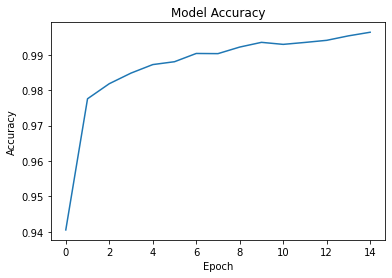

In [7]:
#visualize the model accuracy
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

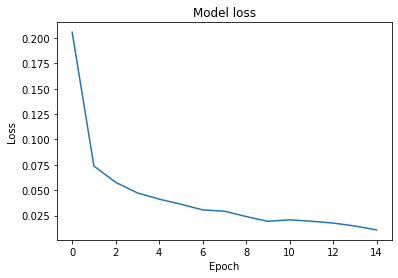

In [8]:
# visualize the model loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [9]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_t)

In [11]:
#generating ImageId and saving final array
arr=np.array(np.argmax(predictions,axis=1),dtype=int)
print(arr.shape)
arr1=np.arange(1,28001).T
array=np.array([arr1,arr])
array=array.T
print(array.shape)

(28000,)
(28000, 2)


In [12]:
# saving predicted labels into csv file
import csv
np.savetxt('sample_submission2.csv',array, delimiter=',')